In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#importamos el dataset directo desde drive
file_id = "1a70xntAnFLuo2qZLyU9ZWQCrj2eQMSyS"  # id AGU01_limpio.xlsx
url = f"https://drive.google.com/uc?id={file_id}"

# Leer archivo Excel
df = pd.read_excel(url, engine="openpyxl")

# Ver los primeros registros
print(df.head())

   Nro_evento               Fecha  Potencia_activa_consumida [kW]  \
0           1 2024-05-01 00:15:00                             424   
1           2 2024-05-01 00:30:00                             421   
2           3 2024-05-01 00:45:00                             494   
3           4 2024-05-01 01:00:00                             610   
4           5 2024-05-01 01:15:00                             562   

   Potencia_activa_generada [kW]  Potencia_reactiva_consumida1 [kVAr]  \
0                              0                                  202   
1                              0                                  210   
2                              0                                  269   
3                              0                                  348   
4                              0                                  321   

   Potencia_reactiva_consumida2 [kVAr]  Potencia_reactiva_generada1 [kVAr]  \
0                                    0                              

In [ ]:
archivo = r"C:\SUBESTACION\AGU01_limpio.xlsx"
df = pd.read_excel(archivo)

In [ ]:
print(df.head())

   Nro_evento               Fecha  Potencia_activa_consumida [kW]  \
0           1 2024-05-01 00:15:00                             424   
1           2 2024-05-01 00:30:00                             421   
2           3 2024-05-01 00:45:00                             494   
3           4 2024-05-01 01:00:00                             610   
4           5 2024-05-01 01:15:00                             562   

   Potencia_activa_generada [kW]  Potencia_reactiva_consumida1 [kVAr]  \
0                              0                                  202   
1                              0                                  210   
2                              0                                  269   
3                              0                                  348   
4                              0                                  321   

   Potencia_reactiva_consumida2 [kVAr]  Potencia_reactiva_generada1 [kVAr]  \
0                                    0                              

In [ ]:
# calculo de las energias generadas
df['Energia_activa [MWh]'] = df['Potencia_activa_generada [kW]'] * (15/60) * (1/1000)
df['Energia_reactiva [MVArh]'] = (
    df['Potencia_reactiva_generada1 [kVAr]'] +
    df['Potencia_reactiva_generada2 [kVAr]']
) * (15/60)*(1/1000)
df['Energia_aparente [MVAh]'] = df['Potencia_aparente_generada [kVA]']*(15/60)*(1/1000)

In [ ]:
# calculo de consumos de energias
df['Consumo_activa [MWh]'] = df['Potencia_activa_consumida [kW]']*(15/60)*(1/1000)

df['Consumo_reactiva [MVArh]'] = (
    df['Potencia_reactiva_consumida1 [kVAr]'] +
    df['Potencia_reactiva_consumida2 [kVAr]']
) * (15/60)*(1/1000)

df['Consumo_aparente [MVAh]'] = df['Potencia_aparente_consumida [kVA]']*(15/60)*(1/1000)

In [ ]:
# calculo factor de potencia energia consumida
df['Factor_potencia_consumida'] = (
    df['Potencia_activa_consumida [kW]'] /
    df['Potencia_aparente_consumida [kVA]']
)

In [ ]:
# los valores que fueron divididos 0/0 y dan valor nullo o error se reemplazaran con 0
df['Factor_potencia_consumida'] = df['Factor_potencia_consumida'].replace([float("inf"), -float("inf")], 0).fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18749 entries, 0 to 18748
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Nro_evento                           18749 non-null  int64         
 1   Fecha                                18749 non-null  datetime64[ns]
 2   Potencia_activa_consumida [kW]       18749 non-null  int64         
 3   Potencia_activa_generada [kW]        18749 non-null  int64         
 4   Potencia_reactiva_consumida1 [kVAr]  18749 non-null  int64         
 5   Potencia_reactiva_consumida2 [kVAr]  18749 non-null  int64         
 6   Potencia_reactiva_generada1 [kVAr]   18749 non-null  int64         
 7   Potencia_reactiva_generada2 [kVAr]   18749 non-null  int64         
 8   Potencia_aparente_consumida [kVA]    18749 non-null  int64         
 9   Potencia_aparente_generada [kVA]     18749 non-null  int64         
 10  Voltaje_F-

In [ ]:
df.to_excel("AGU01_energia.xlsx", index=False)

In [ ]:
# calculo potencia maxima y promedio
potencia_max = df['Potencia_activa_generada [kW]'].max()
potencia_prom = df['Potencia_activa_generada [kW]'].mean()

print(f"Potencia activa generada máxima: {potencia_max:.2f} kW")
print(f"Potencia activa generada promedio: {potencia_prom:.2f} kW")

Potencia activa generada máxima: 11313.00 kW
Potencia activa generada promedio: 3335.83 kW


In [ ]:
# calculo potencia activa maxima y promedio generada mensualmente
df['Mes'] = df['Fecha'].dt.to_period('M')
potencia_mensual = df.groupby('Mes')['Potencia_activa_generada [kW]'].agg(['max', 'mean'])

# Renombrar columnas para claridad
potencia_mensual.columns = ['Potencia_maxima [kW]', 'Potencia_promedio [kW]']

# Mostrar resultados
print(potencia_mensual)

         Potencia_maxima [kW]  Potencia_promedio [kW]
Mes                                                  
2024-05                 11313             4448.817815
2024-06                  8854             3666.936458
2024-07                  8396             3320.665995
2024-08                 10764             3336.396841
2024-09                  6887             2976.968056
2024-10                  5964             3024.893817
2024-11                  4055             1252.652855


In [ ]:
fp_filtrado = df['Factor_potencia_consumida'][df['Factor_potencia_consumida'] != 0]

# Calcular el promedio
factor_potencia_total = fp_filtrado.mean()

print(f"Factor de potencia promedio (sin ceros): {factor_potencia_total:.4f}")

Factor de potencia promedio (sin ceros): 0.5762


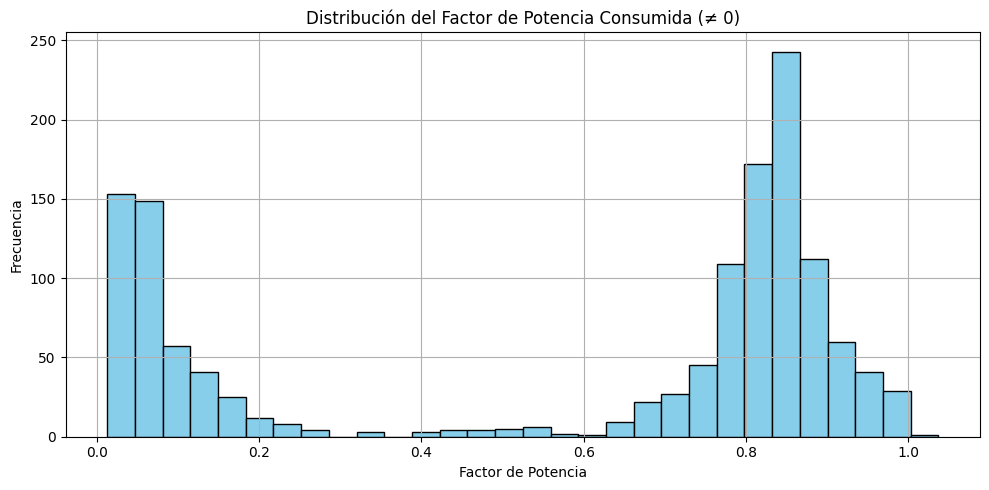

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df[df['Factor_potencia_consumida'] != 0]['Factor_potencia_consumida'],
         bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución del Factor de Potencia Consumida (≠ 0)')
plt.xlabel('Factor de Potencia')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
fp_filtrado = df['Factor_potencia_consumida'][df['Factor_potencia_consumida'] > 0.2]

# Calcular el promedio
factor_potencia_total = fp_filtrado.mean()

print(f"Factor de potencia promedio (sin ceros): {factor_potencia_total:.4f}")

Factor de potencia promedio (sin ceros): 0.8154


In [ ]:
# energia activa total generada AGU01
energia_total = df['Energia_activa [MWh]'].sum()
print(f"Energía total generada AGU01: {energia_total:.2f} MWh")

Energía total generada AGU01: 15635.89 MWh


In [ ]:
# generacion mensual energia activa
suma_mensual = df.groupby('Mes')['Energia_activa [MWh]'].sum()

# Mostrar el resultado
print(suma_mensual)


Mes
2024-05    3308.80825
2024-06    2640.19425
2024-07    2470.57550
2024-08    2482.27925
2024-09    2143.41700
2024-10    2250.52100
2024-11     340.09525
Freq: M, Name: Energia_activa [MWh], dtype: float64


In [ ]:
# Calculo crecimiento porcentual de enercia activa mes a mes
crecimiento_mensual = suma_mensual.pct_change() * 100

# Redondear a 2 decimales para mejor lectura
crecimiento_mensual = crecimiento_mensual.round(2)

# Mostrar resultados
print(crecimiento_mensual)

Mes
2024-05      NaN
2024-06   -20.21
2024-07    -6.42
2024-08     0.47
2024-09   -13.65
2024-10     5.00
2024-11   -84.89
Freq: M, Name: Energia_activa [MWh], dtype: float64


In [ ]:
# calculo de los consumos de energia activa, reactiva y aparente mensualmente
consumo_mensual = df.groupby('Mes')[[
    'Consumo_activa [MWh]',
    'Consumo_reactiva [MVArh]',
    'Consumo_aparente [MVAh]'
]].sum()

# Mostrar resultados
print(consumo_mensual)

         Consumo_activa [MWh]  Consumo_reactiva [MVArh]  \
Mes                                                       
2024-05              26.59850                2971.89600   
2024-06               8.08400                3532.63050   
2024-07               2.20050                3937.87025   
2024-08              17.13450                3795.73550   
2024-09               0.17025                4091.30900   
2024-10               0.17125                4192.03750   
2024-11              54.16825                 609.99975   

         Consumo_aparente [MVAh]  
Mes                               
2024-05                 33.66400  
2024-06                 10.44650  
2024-07                  3.95875  
2024-08                 23.92650  
2024-09                  2.23500  
2024-10                  1.90675  
2024-11                 64.28800  


In [ ]:
voltajes_mensuales = df.groupby('Mes')[[
    'Voltaje_F-N_A [kV]',
    'Voltaje_F-N_B [kV]',
    'Voltaje_F-N_C [kV]'
]].agg(['max', 'min'])

# Mostrar la tabla
print(voltajes_mensuales)

        Voltaje_F-N_A [kV]       Voltaje_F-N_B [kV]       Voltaje_F-N_C [kV]  \
                       max   min                max   min                max   
Mes                                                                            
2024-05               67.4  63.6               67.5  63.6               67.5   
2024-06               67.6  64.7               67.7  64.7               67.6   
2024-07               67.5  29.6               67.6  29.6               67.5   
2024-08               69.3   3.4               69.3   3.4               69.1   
2024-09               68.0  65.6               68.1  65.7               68.1   
2024-10               68.3  65.5               68.4  65.6               68.3   
2024-11               68.3  64.0               68.2  64.0               68.0   

               
          min  
Mes            
2024-05  63.6  
2024-06  64.7  
2024-07  29.6  
2024-08   3.4  
2024-09  65.7  
2024-10  65.6  
2024-11  63.9  


In [ ]:
amperajes_mensuales = df.groupby('Mes')[[
    'Amperaje_A [A]',
    'Amperaje_B [A]',
    'Amperaje_C [A]'
]].agg(['max', 'mean'])

# Mostrar la tabla
print(amperajes_mensuales)

        Amperaje_A [A]           Amperaje_B [A]           Amperaje_C [A]  \
                   max      mean            max      mean            max   
Mes                                                                        
2024-05           1.47  0.777230           1.50  0.789187           1.49   
2024-06           1.19  0.780781           1.22  0.793274           1.20   
2024-07           1.22  0.777557           1.24  0.796529           1.22   
2024-08           1.30  0.769909           1.33  0.788411           1.32   
2024-09           1.08  0.789601           1.10  0.810465           1.10   
2024-10           1.17  0.783360           1.21  0.811478           1.21   
2024-11           1.11  0.337072           1.13  0.338987           1.13   

                   
             mean  
Mes                
2024-05  0.802299  
2024-06  0.804059  
2024-07  0.805097  
2024-08  0.798065  
2024-09  0.821604  
2024-10  0.818451  
2024-11  0.342781  
